<a href="https://colab.research.google.com/github/Nourjaweny/Line-Follower-Robot-C-/blob/main/logisticregressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop("User ID",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
one_Hot=pd.get_dummies(df['Gender'])
df=df.drop('Gender',axis=1)
df=df.join(one_Hot)
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Female', 'Male'], dtype='object')

In [ ]:
x=df[['Female','Male','Age','EstimatedSalary']]
y=df['Purchased']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_predicted=logreg.predict(x_test)
print(logreg.score(x_test,y_test))

0.7


In [ ]:
sns.regplot(x=x_test,y='Purchased',data=df)


<Axes: xlabel='Predicted', ylabel='Actual'>

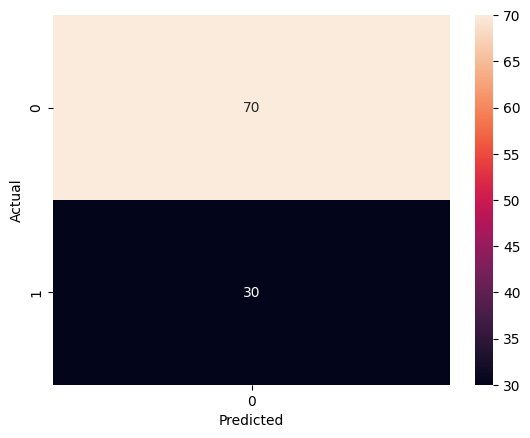

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        70
           1       0.00      0.00      0.00        30

    accuracy                           0.70       100
   macro avg       0.35      0.50      0.41       100
weighted avg       0.49      0.70      0.58       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
